In [2]:
%load_ext autoreload
%autoreload 2

In [2]:
import glob
import time
print("Running on ", time.asctime())

import numpy             as np
import tables            as tb
import json
from typing import Sequence

from invisible_cities.io.pmaps_io      import load_pmaps
from invisible_cities.evm.histos import HistoManager

from collections import defaultdict

from   invisible_cities.io.hist_io         import get_histograms_from_file

import invisible_cities.reco.histogram_functions as histf
import invisible_cities.icaro.histogram_plot_functions as histplotf
import invisible_cities.reco.monitor_functions   as monf
import invisible_cities.database.load_db         as dbf
import invisible_cities.io.dst_io as dstio

from invisible_cities.icaro.hst_functions  import shift_to_bin_centers
from invisible_cities.core .core_functions import weighted_mean_and_std
import matplotlib.pyplot as plt

import invisible_cities.core.fit_functions as fitf

from invisible_cities.core .core_functions import in_range
from icaro.core.fit_functions import fit_slices_1d_gauss
from icaro.core.fit_functions import expo_seed


Running on  Mon Jul  2 21:06:23 2018


In [4]:
%matplotlib inline

In [6]:
histomanager = get_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/5862/new_pmap_histos.h5')

In [32]:
histomanager     = get_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/new_pmap_histos.h5')
histomanager_dev = get_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165_dev/new_pmap_histos.h5')

In [24]:
pmaps_dev = load_pmaps('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165_dev/pmaps_0000_6165_v0.9.7-19-g574c657_20180615_kr1300.h5')
pmaps     = load_pmaps('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/pmaps_0000_6165_v0.9.7_20180615v3-1-g14b73bd_kr1300.h5')

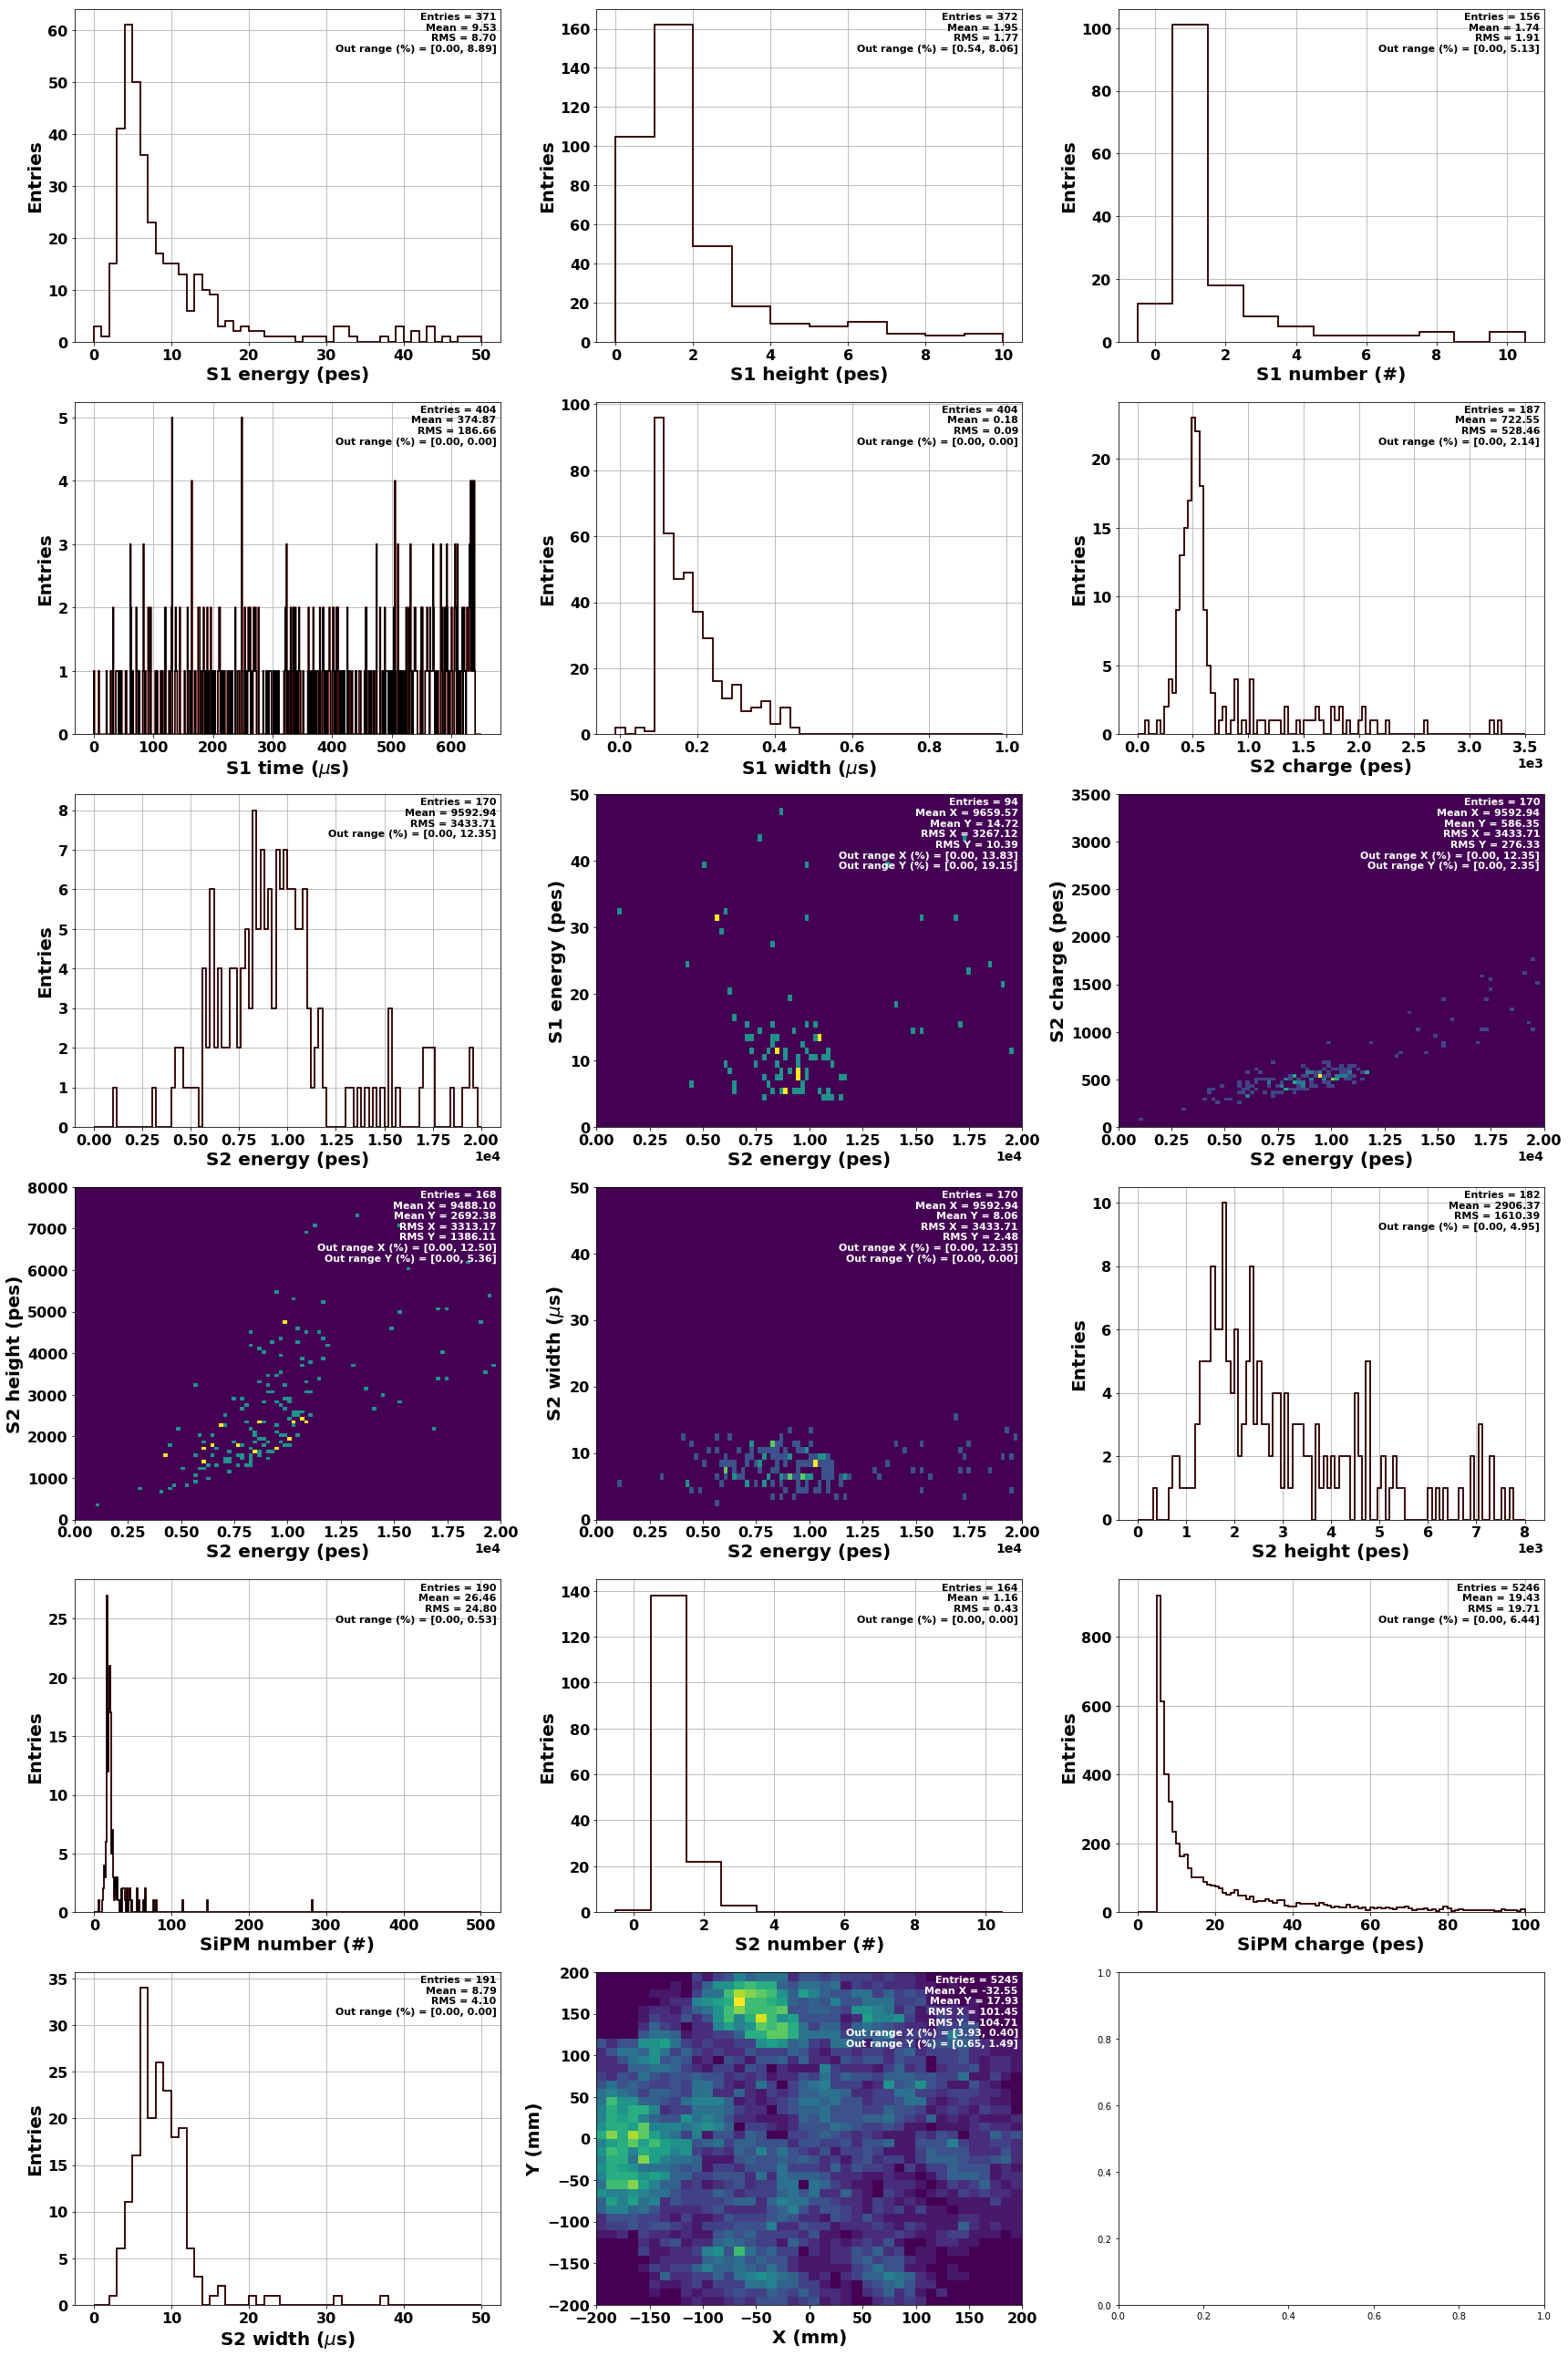

In [33]:
histplotf.plot_histograms(histomanager_dev, reference_histo=histomanager, 
                          histonames=['S1_Energy', 'S1_Height', 'S1_Number', 'S1_Time', 'S1_Width', 'S2_Charge', 'S2_Energy', 'S2_Energy_S1_Energy', 'S2_Energy_S2_Charge', 'S2_Energy_S2_Height', 'S2_Energy_S2_Width', 'S2_Height', 'S2_NSiPM', 'S2_Number', 'S2_QSiPM', 'S2_Width', 'S2_XYSiPM'], 
                          normed=False)

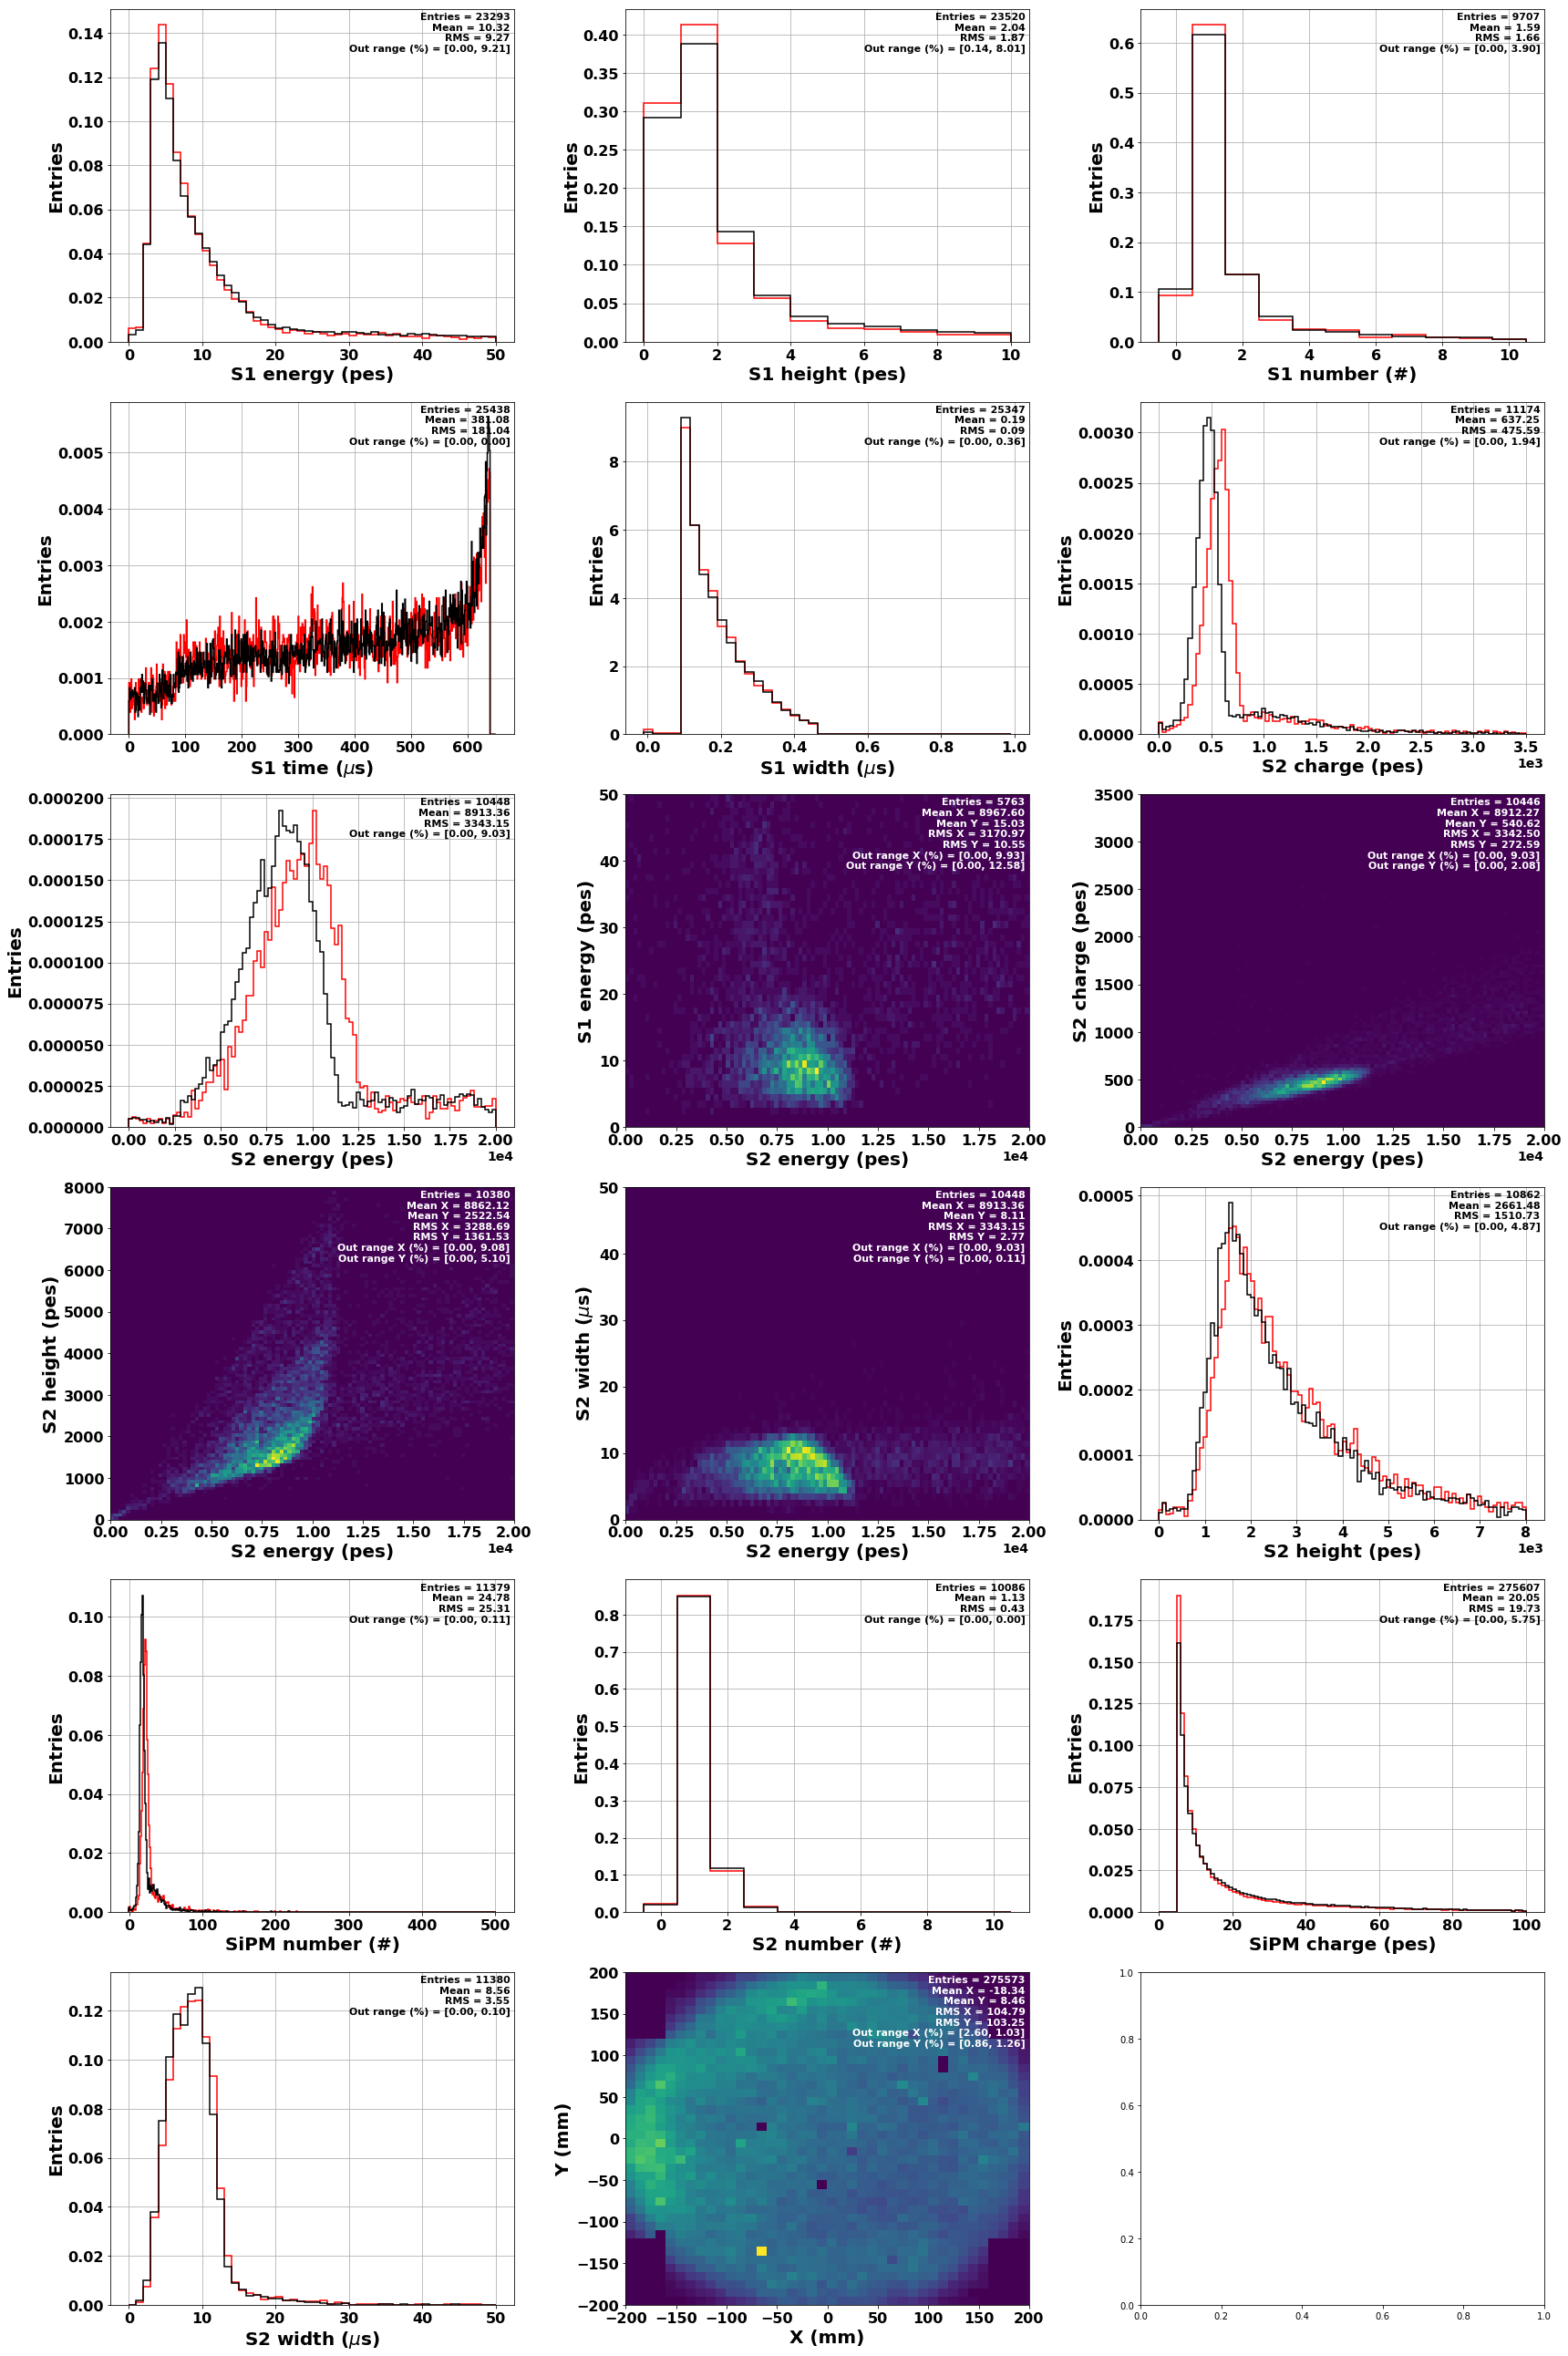

In [11]:
histplotf.plot_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6181/new_pmap_histos.h5',
                                    reference_histo='/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/new_pmap_histos.h5',
                                    histonames=['S1_Energy', 'S1_Height', 'S1_Number', 'S1_Time', 'S1_Width', 'S2_Charge', 'S2_Energy', 'S2_Energy_S1_Energy', 'S2_Energy_S2_Charge', 'S2_Energy_S2_Height', 'S2_Energy_S2_Width', 'S2_Height', 'S2_NSiPM', 'S2_Number', 'S2_QSiPM', 'S2_Width', 'S2_XYSiPM'],) 
#                                    out_path='/Users/ansimez/Documents/InvCit/hdf5/Run4/5862/Image')

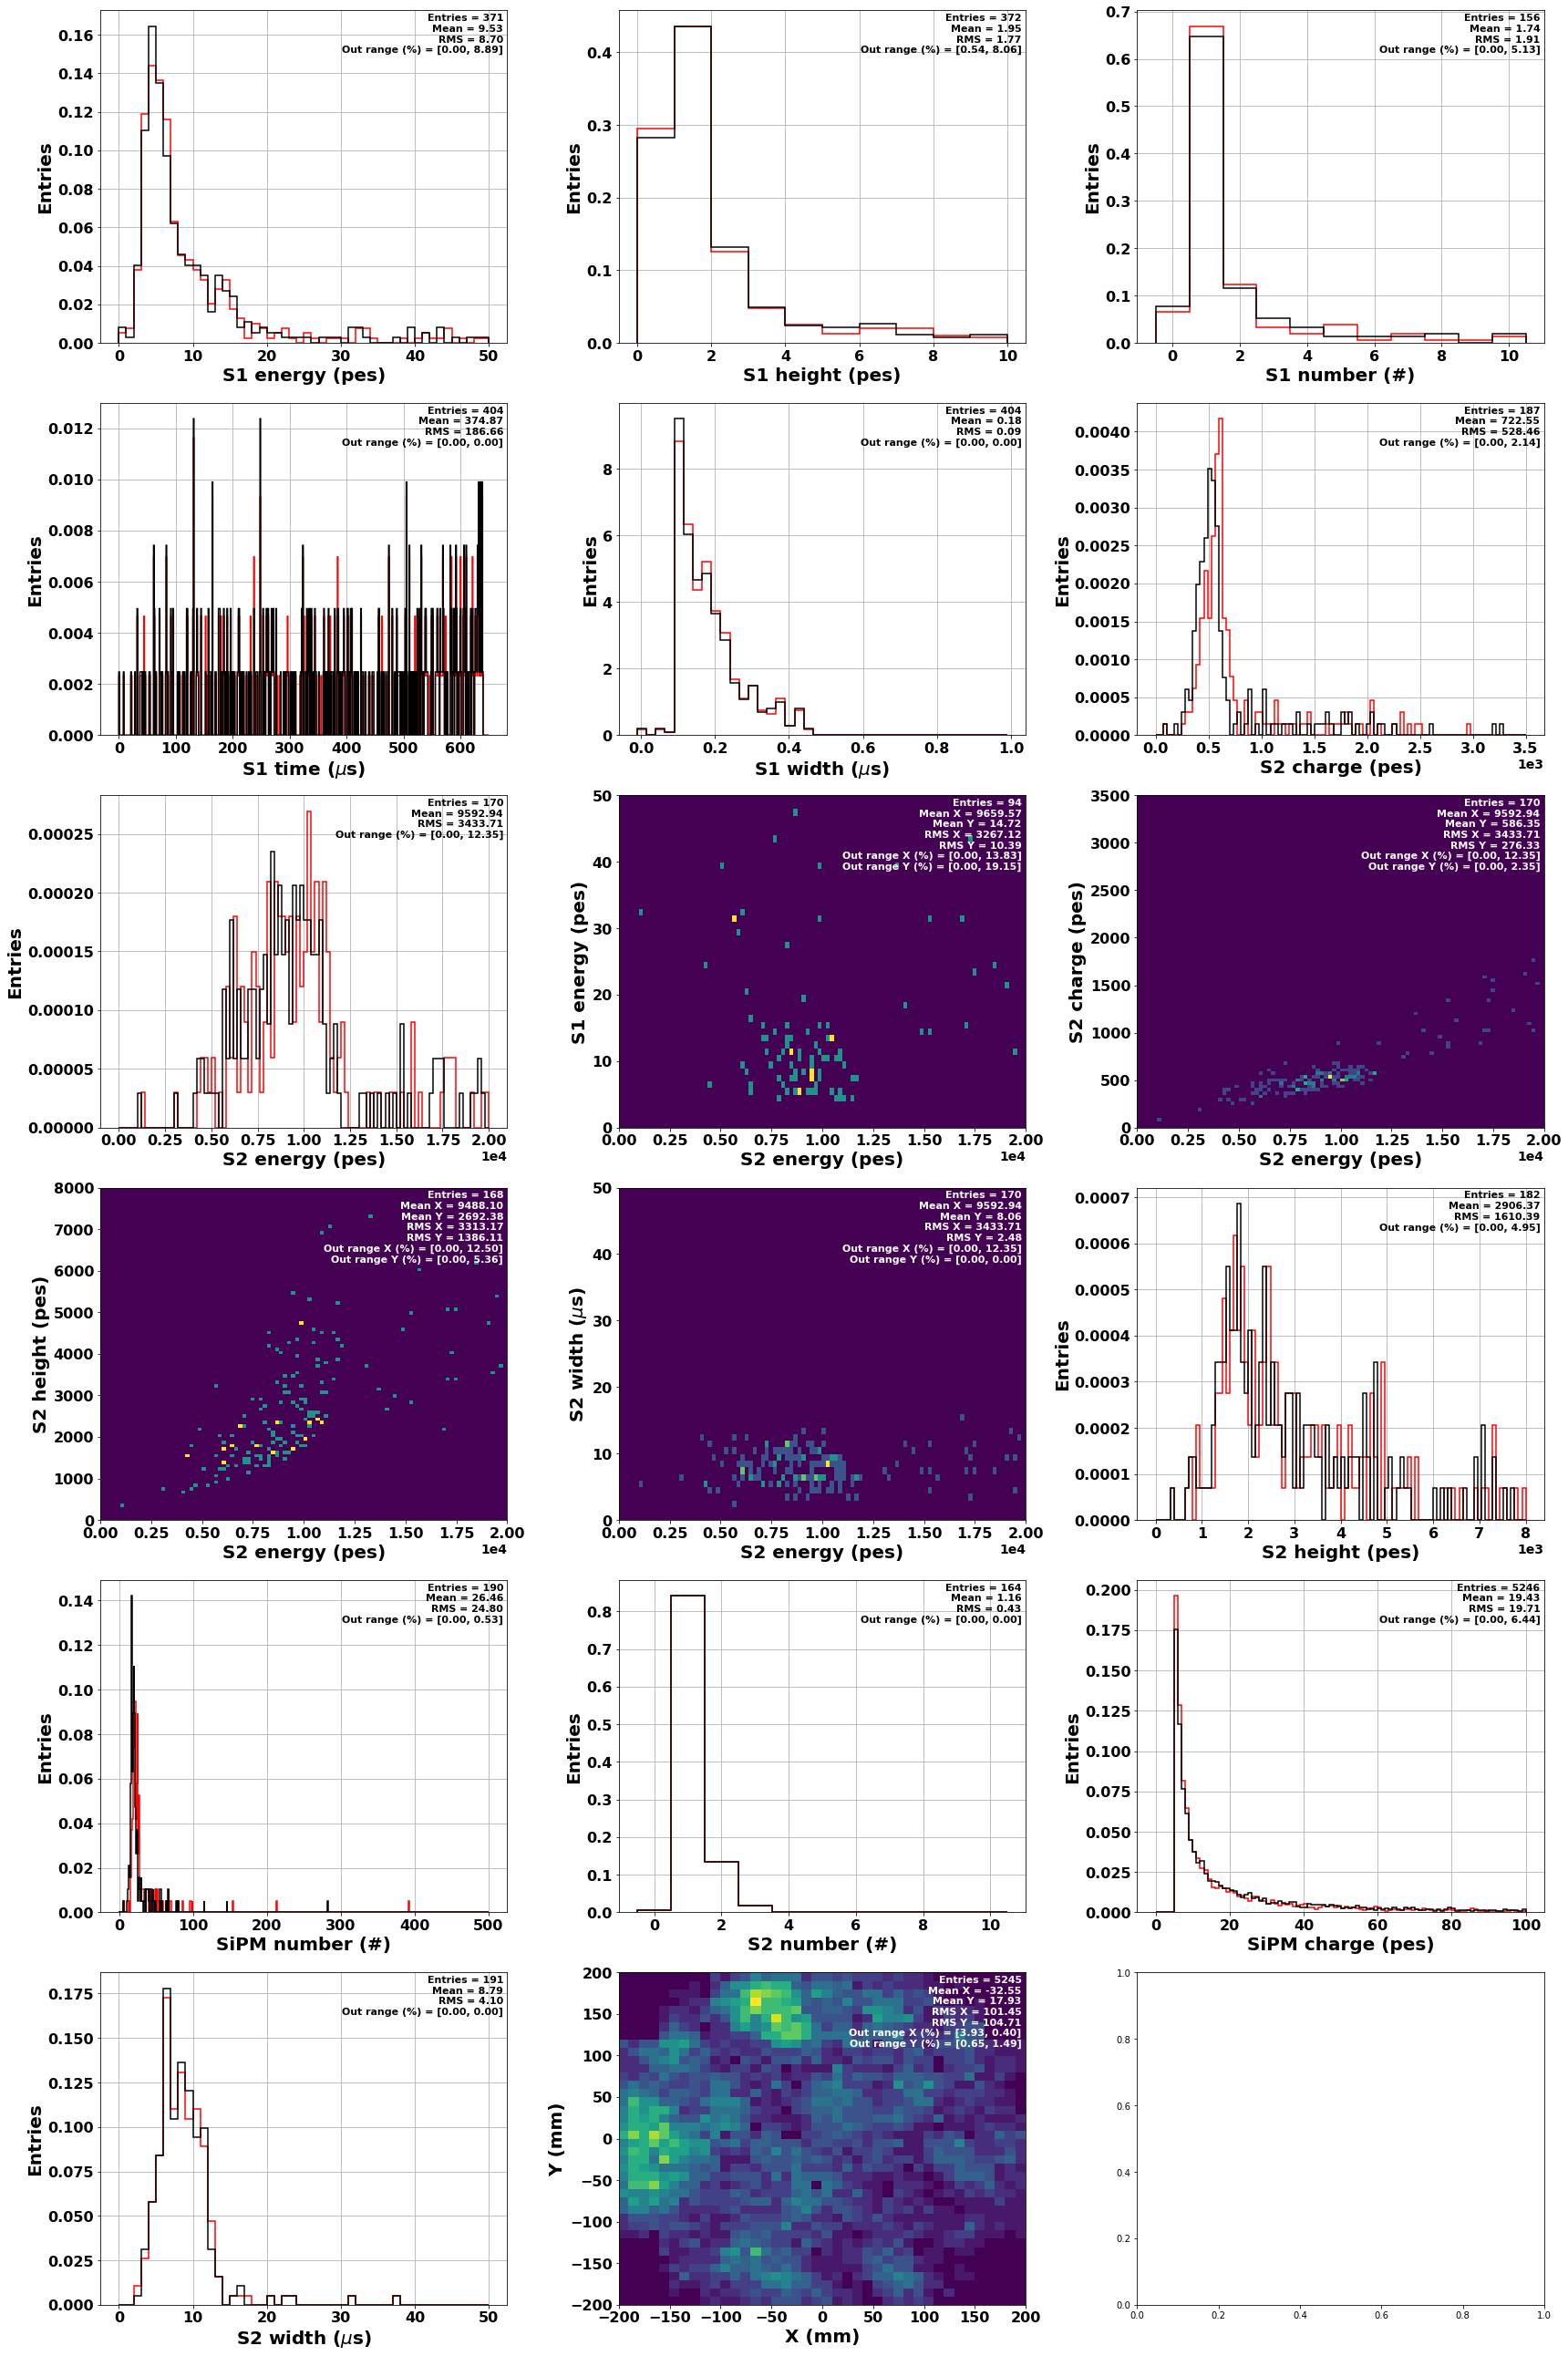

In [18]:
histplotf.plot_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165_dev/new_pmap_histos.h5',
                                    reference_histo='/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/new_pmap_histos.h5',
                                    histonames=['S1_Energy', 'S1_Height', 'S1_Number', 'S1_Time', 'S1_Width', 'S2_Charge', 'S2_Energy', 'S2_Energy_S1_Energy', 'S2_Energy_S2_Charge', 'S2_Energy_S2_Height', 'S2_Energy_S2_Width', 'S2_Height', 'S2_NSiPM', 'S2_Number', 'S2_QSiPM', 'S2_Width', 'S2_XYSiPM'],) 
#                                    out_path='/Users/ansimez/Documents/InvCit/hdf5/Run4/5862/Image')

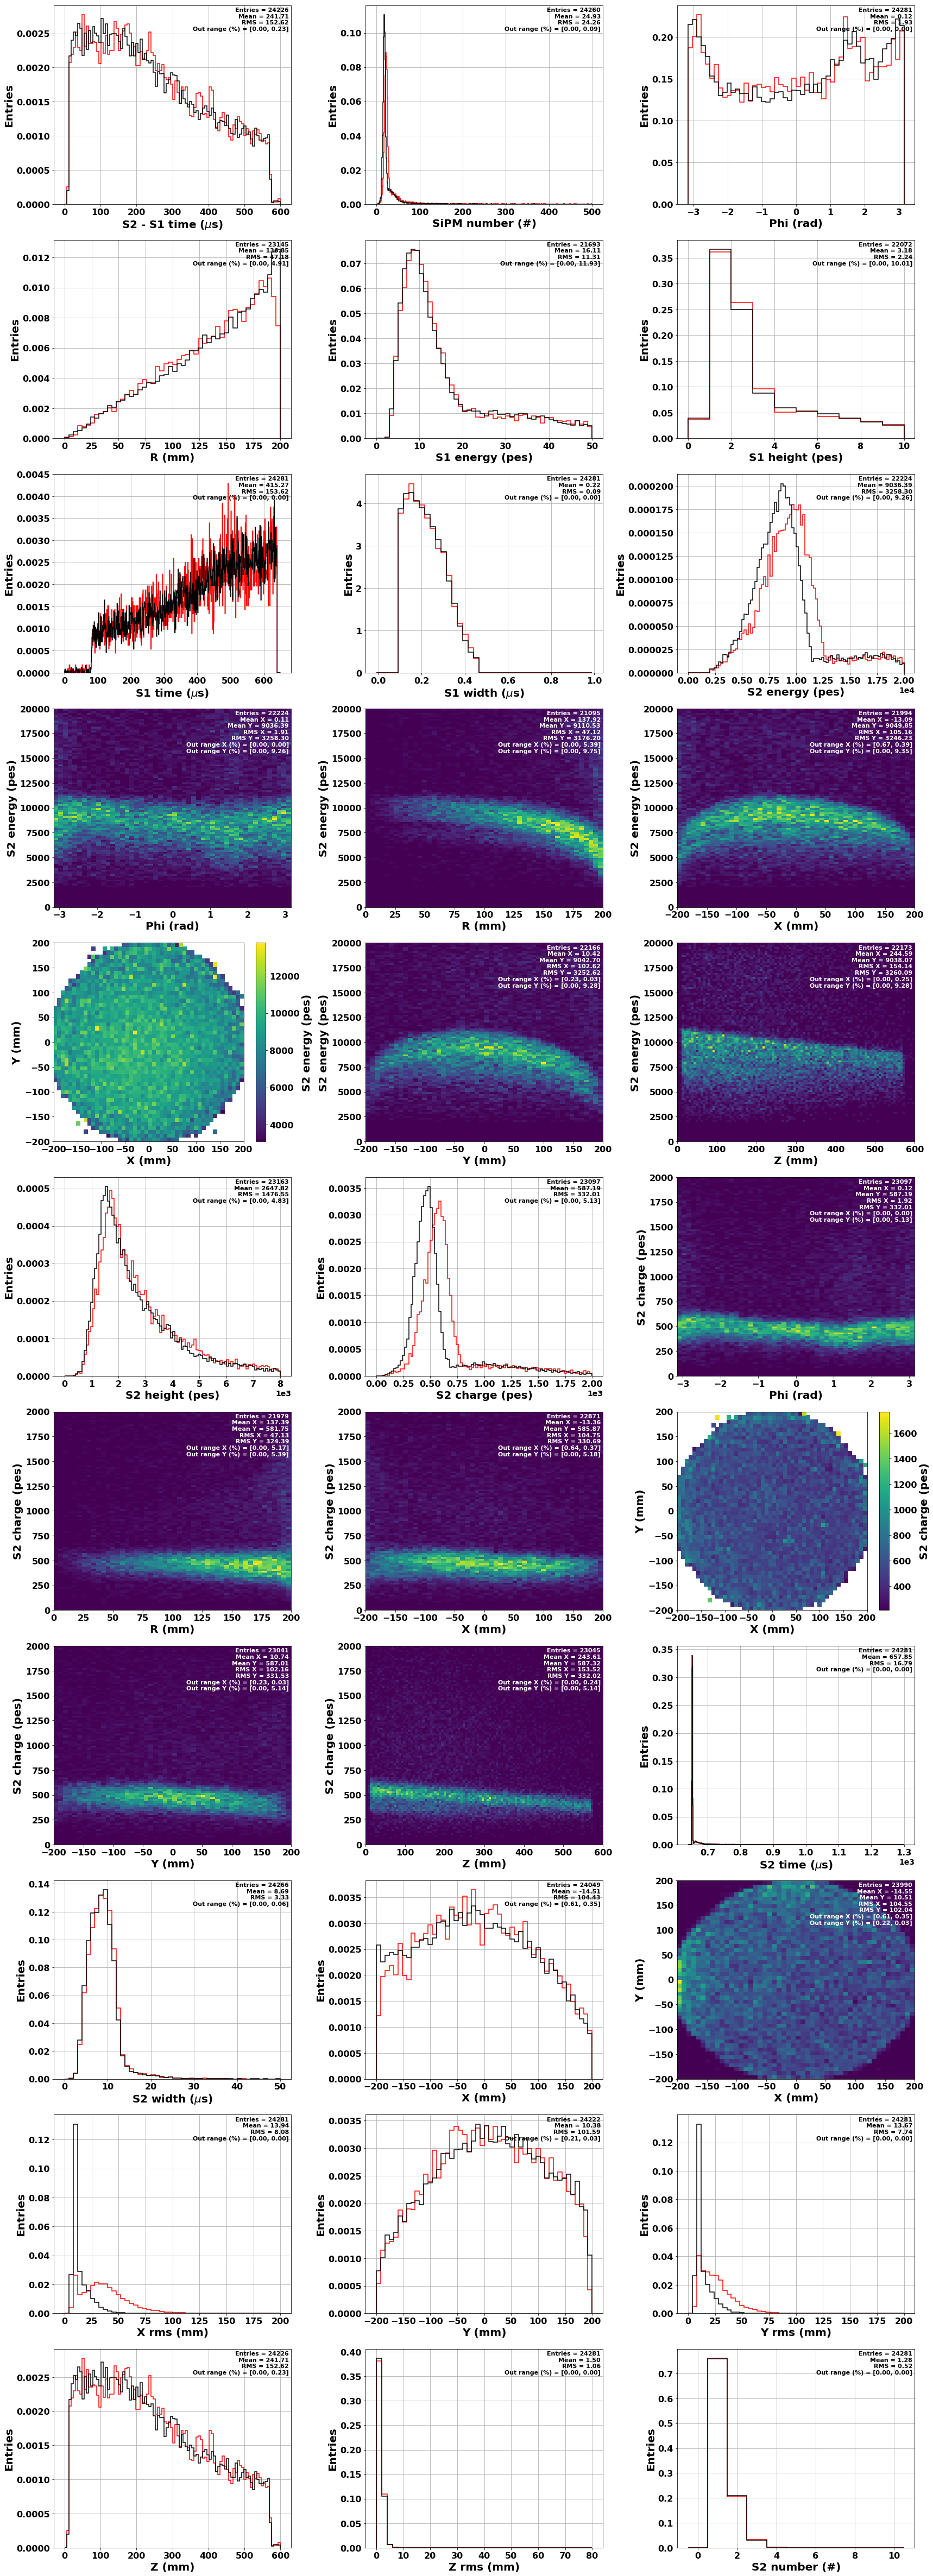

In [13]:
histplotf.plot_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6181/new_kdst_histos.h5',
                                    reference_histo='/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/new_kdst_histos.h5')#                                    out_path='/Users/ansimez/Documents/InvCit/hdf5/Run4/5862/Image')

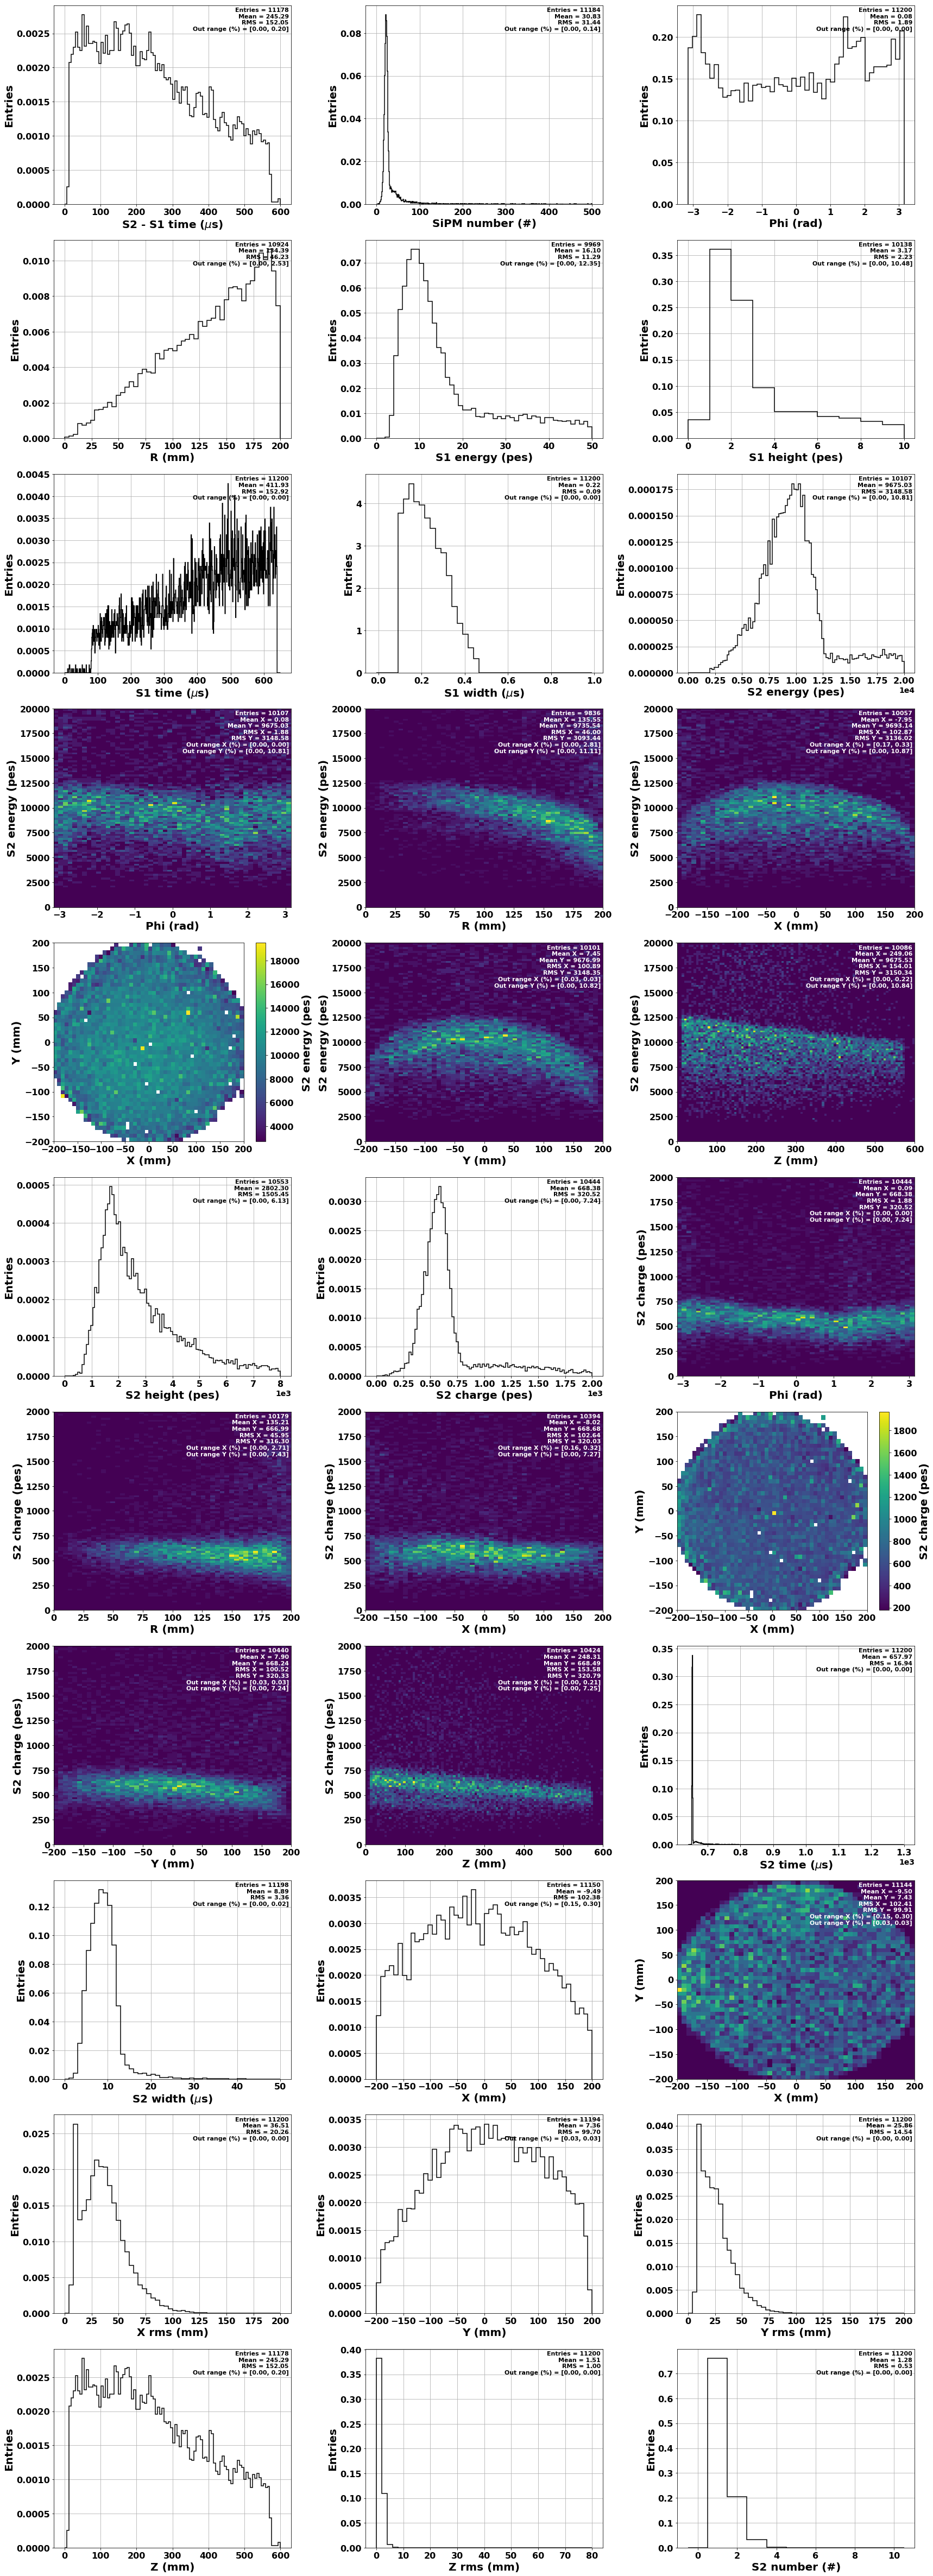

In [14]:
histplotf.plot_histograms_from_file('/Users/ansimez/Documents/InvCit/hdf5/Run4/6165/new_kdst_histos.h5')#                                    out_path='/Users/ansimez/Documents/InvCit/hdf5/Run4/5862/Image')